# Gramener Case Study

The analysis is divided into these  parts:
1-Data understanding 
2-Data cleaning
3-Data Analysis 
4-Recommendations

In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import load dataframe 
loan= pd.read_csv("../Downloads/loan.csv",encoding = "ISO-8859-1",low_memory=False)

#Lets descibe the data and see the different column of the data frame imported.
loan.describe()
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Step 1 : Inspecting the dataframe

In [4]:
loan.info()
loan.describe()
loan.shape
loan.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

So in loan dataset there are 39717 rows and 111 columns

# Data Cleaning 

Data Cleaning Steps:-<Br>
1-Checking the null count for different columns with null percentage.<br>
2-Removing columns with high null percentage value.<br>
3-Check and remove if any Rows with high na values.<br>
4-Since we are not going to perform any text processing as a part of this assignment so removing coloumn description.<br>
5-We will use emp_title to identify the defaulters. We can see same job titles with different case and characters like walmart, WALMART,WAL-MART are the same. So will remove the punctuation character.
int_rate column has % character so it is treated as string column, so will convert into numeric float64.

In [5]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [6]:
# removing the columns having all NULL values
loan = loan.dropna(axis=1, how='all')
print(loan)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    13

In [7]:
#checking the missing value greater than 90%
loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [8]:
# Code for dropping the columns. 
loan = loan.drop(['mths_since_last_record', 'next_pymnt_d'], axis = 1)
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
# now we see here is two column whose contain 64% and 32%, so finding the details of it.
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [10]:
#Now we saw both column contains the status of  loan apply 
#drop columns 
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [11]:
#find missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [12]:
#now check row wise missing values 

loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [13]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [14]:
# now approx our data is cleaned now check the info of our cleaned dataset 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [15]:
#Convert to uppercase and remove al the punctuation characters.
loan.emp_title= loan.emp_title.str.replace('[^\w\s]','')
loan.emp_title = loan.emp_title.str.upper()

In [16]:
# We will rstrip the column to get only the numeric part before % and then convert to numeric part.
loan.int_rate = loan.int_rate.str.rstrip("%")
loan.int_rate = pd.to_numeric(loan.int_rate)

In [17]:
#Fillinf NA value for the column emp length wih 0. And and any non-digit by blank.
loan.emp_length=loan[['emp_length']].fillna(value='0')
loan.emp_length=loan.emp_length.str.replace('[\D]','')astype()
loan.emp_length

0        10
1         1
2        10
3        10
4         1
5         3
6         8
7         9
8         4
9         1
10        5
11       10
12        1
13        3
14        3
15        1
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
26        9
27        2
28       10
29        1
         ..
39687     9
39688     6
39689     1
39690     3
39691     1
39692     1
39693     1
39694     8
39695     7
39696     2
39697     1
39698     1
39699     4
39700     1
39701     7
39702     1
39703     2
39704     1
39705     8
39706     1
39707     2
39708     4
39709     1
39710     1
39711     5
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: int32

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    39717 non-null int32
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

# Data Preperation 


1-We are introducing a column profit_loss_to_company, which is amount of money in loss or profit to the company. calculated as total payment made - funded amount to the borrower.(Business-driven Metric)<br>
2-We will remove the outliers from profit/loss. Will keep rows having 0-95 %ile of the column value. Derived Metrics<br>
3-We will take the data frame containing the loan applicants with loan status "Charged Off" and "Fully Paid", Since we can't draw any inference on loan application which is current i.e in running status.<br>
4-We will define a new term as Conversion percentage, Percentage of loan application which leads to default i.e Charged Off.<br>

In [19]:
loan['profit_loss_to_company'] = loan['total_pymnt']-loan['funded_amnt']

In [20]:
loan_paid_and_chrgd_off = loan[(loan.loan_status=='Fully Paid') | (loan.loan_status=='Charged Off')]
loan_paid_and_chrgd_off

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,profit_loss_to_company
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,863.155187
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,-1491.290000
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,605.666844
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,2231.890000
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,632.210000
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,3110.840000
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,939.135294
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,...,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,-4953.980000
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,...,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,-3898.810000
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65,153.45,C,C3,...,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1178.017673


# Data Analysis

Following Analysis will be carried out and will be represented through different plots.<br>
1-Univariate Analysis with different variables. <br>
2-Bivariate analysis with different plots.<br>

# Analyis 1 : Profit/Loss with different Purpose filled by the borrower.

Loan status charged off dataframe extracted. Box plot is plotted for different purposes.<br>
**Observation :**<br>
We can see that major losses are loan applicant for the small_business purpose,and debt consolidation so these are some
risk areas of passing the loan.There is large spread of distribution means that there has been some profits as well
But the median and 0th-95%ile lies in loss.
<br>
<br>
The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant  2. loan characteristics and 3. Customer behaviour variables 

In [21]:
# now drop column_names
loan_frame = loan.drop([
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
'title', 'url', 'zip_code', 'addr_state'], axis=1)
loan_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    39717 non-null int32
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [22]:
loan_frame['loan_status'] = loan_frame['loan_status'].astype('category')
loan_frame['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

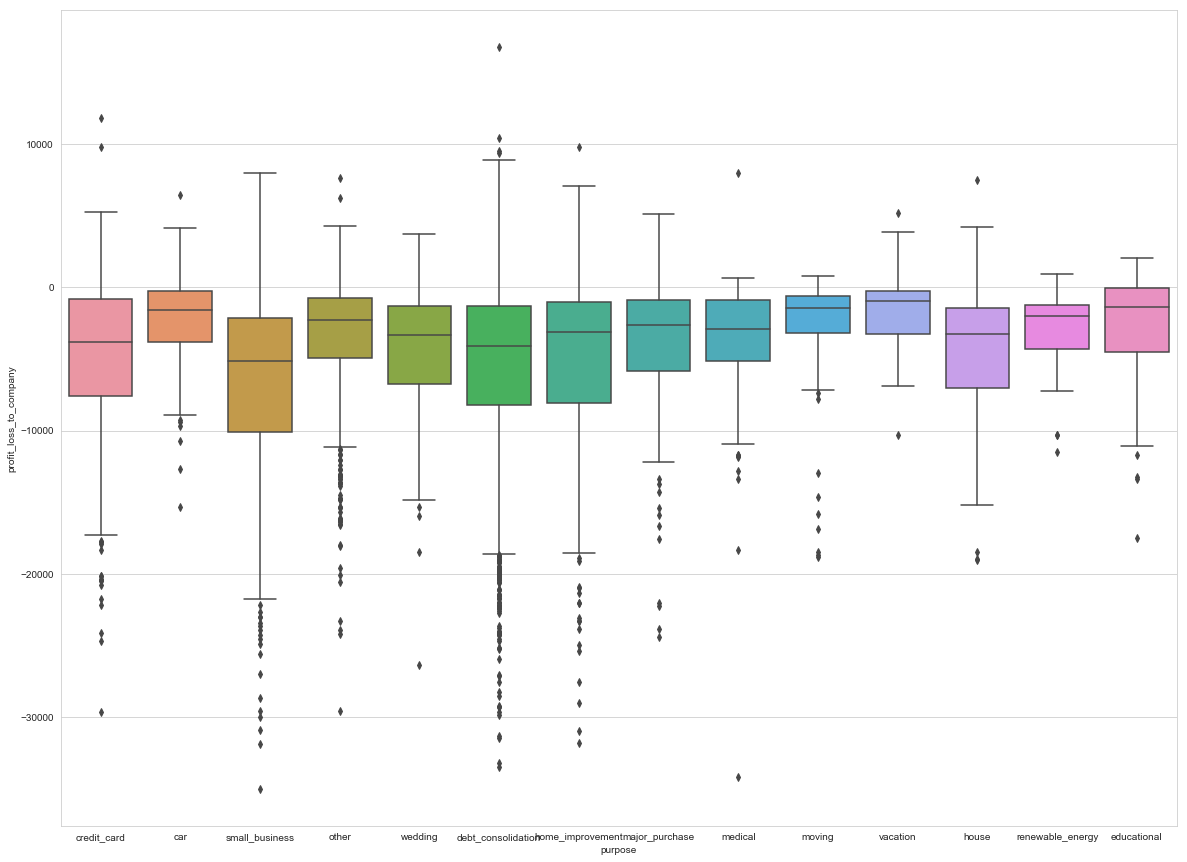

In [23]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")
loan_frame_chargedoff = loan[loan.loan_status=='Charged Off']

sns.boxplot(x= loan.purpose,y=loan_frame_chargedoff.profit_loss_to_company,data=loan_frame_chargedoff)
plt.show()

# Analyis 2 : Defaulter frequency over different States with address state code. (Univariate Analysis)

**Observation :**<br>
We can see that CA California has maximum no of defaulters. Florida,Texas and New York also has high no of defaulters. Application for these countries should be reviewed properly and verification process needs to be taken more seriously.<br>
**Suggestion :**<br>
Loan applications from such states should be thoroughly investigated and factors leading to such high count should be looked into.

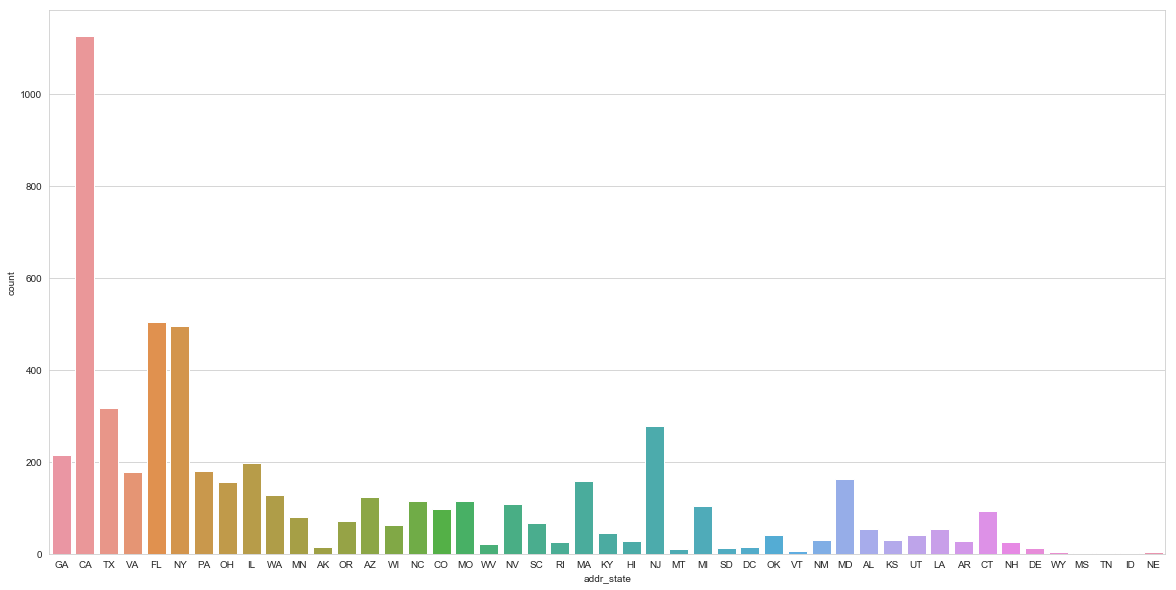

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x=loan_frame_chargedoff.addr_state,data=loan_frame_chargedoff)

In [25]:
# filtering only fully paid or charged-off
loan_frame = loan_frame[loan_frame['loan_status'] != 'Current']
loan_frame['loan_status'] = loan_frame['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_frame['loan_status'] = loan_frame['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_frame['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [26]:
# default rate
round(np.mean(loan_frame['loan_status']), 4)

0.1459

The overall default rate is about 14%. 


Let's first visualise the average default rates across categorical variables

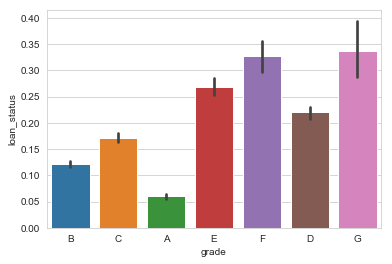

In [27]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=loan_frame)
plt.show()

Hence the grade of loan goes from A to G, the default rate increases

In [28]:
# lets define a function to plot loan_status across categorical variables
def plot_variable(var):
    sns.barplot(x=var, y='loan_status', data=loan_frame)
    plt.show()
    

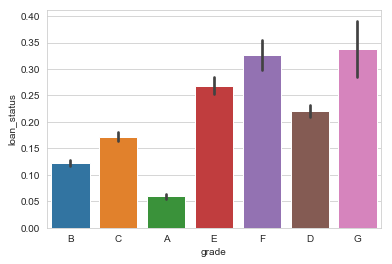

In [29]:
# compare default rates across grade of loan
plot_variable('grade')

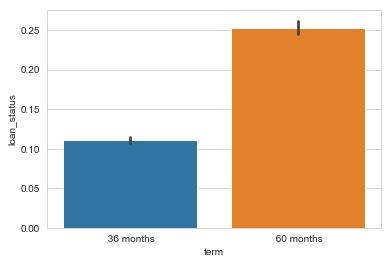

In [30]:
plot_variable('term')

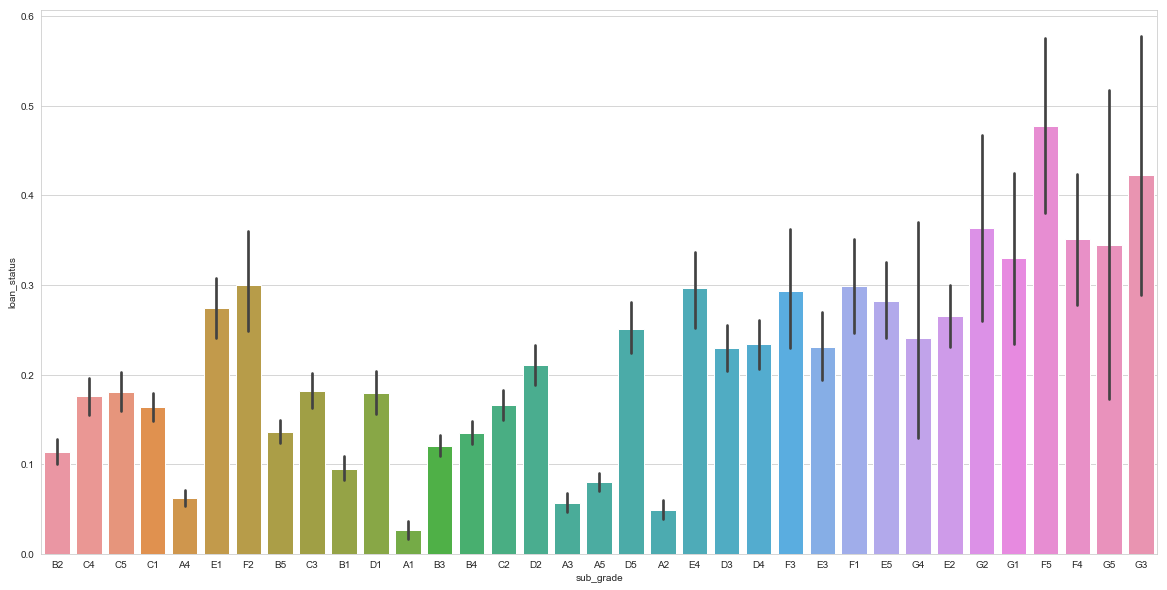

In [31]:
# sub-grade:
plt.figure(figsize=(20, 10))
plot_variable('sub_grade')

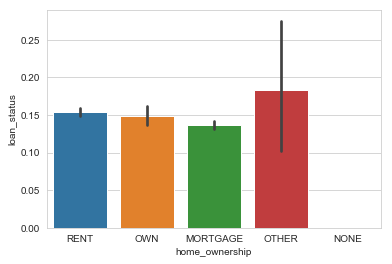

In [32]:
plot_variable('home_ownership')

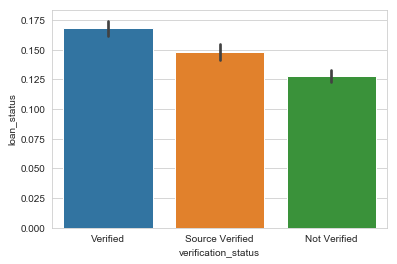

In [33]:
plot_variable('verification_status')

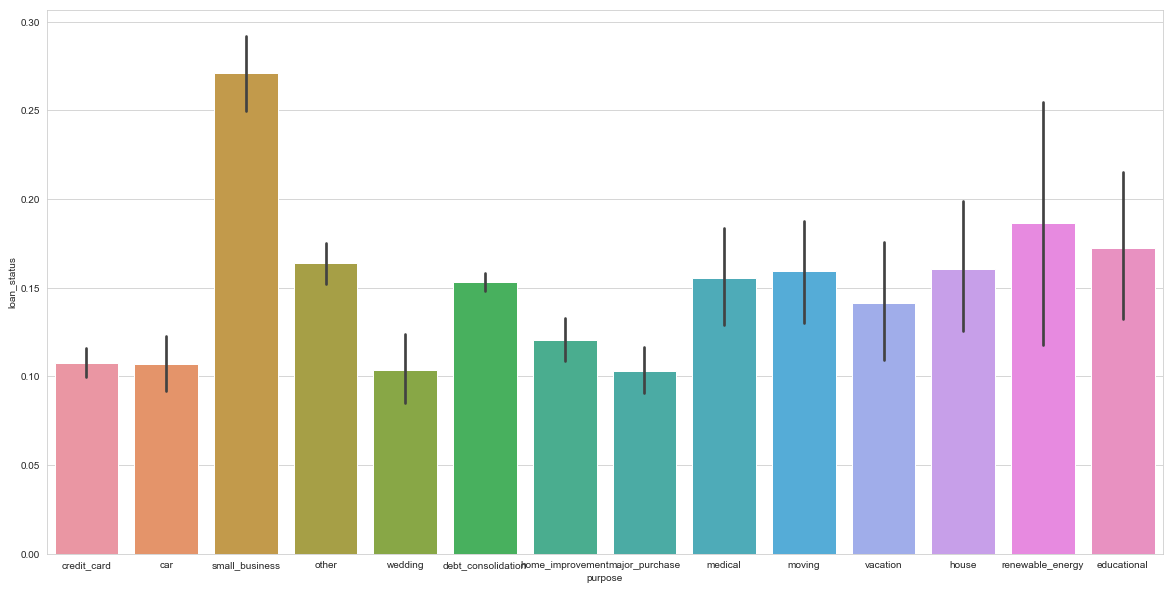

In [34]:
plt.figure(figsize=(20, 10))
plot_variable('purpose')

**Analyis 3 : Defaulter percentage with different address(addr_state)**<br>
we will calulate the percentage of the application which gets defaulted in different states of the country to see the
conversion percentage. <br>
**Observation :**
We can see that Nebraska (NE), has the maximum percentage of defaulters considering the total no of the loan applicants.
Suggestion :Verification should be reviewed and improved accordingly.<br>
Need to investigate on further factors why NE and Nevada(NV) such states have high no of defaulter percentage. 

In [35]:
#Group by address_state and get the count for the defaulters application in the column count_chargedoff. 
temp_frame_count = loan_frame_chargedoff.groupby("addr_state").count()
temp_frame_count.reset_index()
add_chargedoff_Count = temp_frame_count.loc[:,['id']]
add_chargedoff_Count.reset_index()
add_chargedoff_Count.rename(columns={'id':'count_chargedoff'},inplace=True)
add_chargedoff_Count.reset_index(inplace=True)

#Group by address_state and get the count for all the application in the column count_off. 
temp_frame_count_1 = loan.groupby("addr_state").count()
temp_frame_count_1.reset_index()
add_Count = temp_frame_count_1.loc[:,['id']]
add_Count.reset_index()
add_Count.rename(columns={'id':'count_off'},inplace=True)
add_Count.reset_index(inplace=True)

# Lets merge the two data frames and  calculate the conversion percentage.
conversion_loan_application= pd.merge(add_chargedoff_Count,add_Count,how="inner")
conversion_loan_application['conversion_percentage'] = round((conversion_loan_application['count_chargedoff']/conversion_loan_application['count_off'])*100,2)
conversion_loan_application

,addr_state,count_chargedoff,count_off,conversion_percentage
0,AK,15,80,18.75
1,AL,54,452,11.95
2,AR,27,245,11.02
3,AZ,123,879,13.99
4,CA,1125,7099,15.85
5,CO,98,792,12.37
6,CT,94,751,12.52
7,DC,15,214,7.01
8,DE,12,114,10.53
9,FL,504,2866,17.59


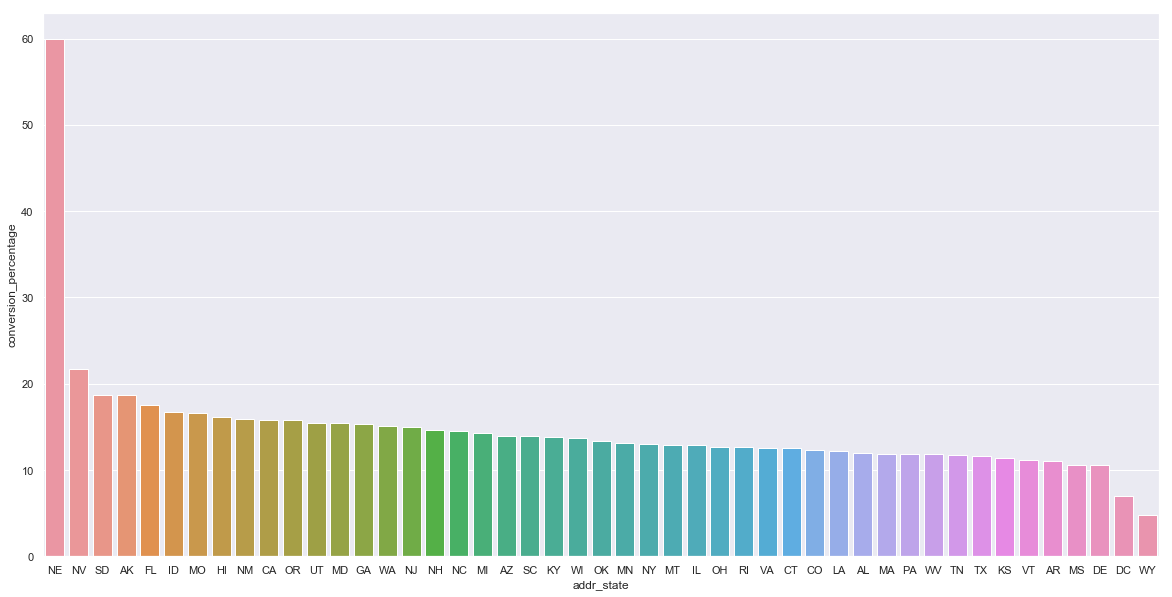

In [36]:
#Plotting the barplot for the conversion percentage. Defaulter percentage in different states of the country.

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})

#Sort it by descending order
conversion_loan_application.sort_values(by="conversion_percentage",inplace=True,ascending=False)

sns.barplot(x="addr_state",y="conversion_percentage",data=conversion_loan_application)

**Analyis 4 : Defaulter frequency over Home Ownership**<br>
**Observation :**<br>
Applicants having home ownership as RENT or MORTGAGE are more probable for defaulting the loan. Gross salary expenditure and other debts should be properly verified since they have debt to pay for house.

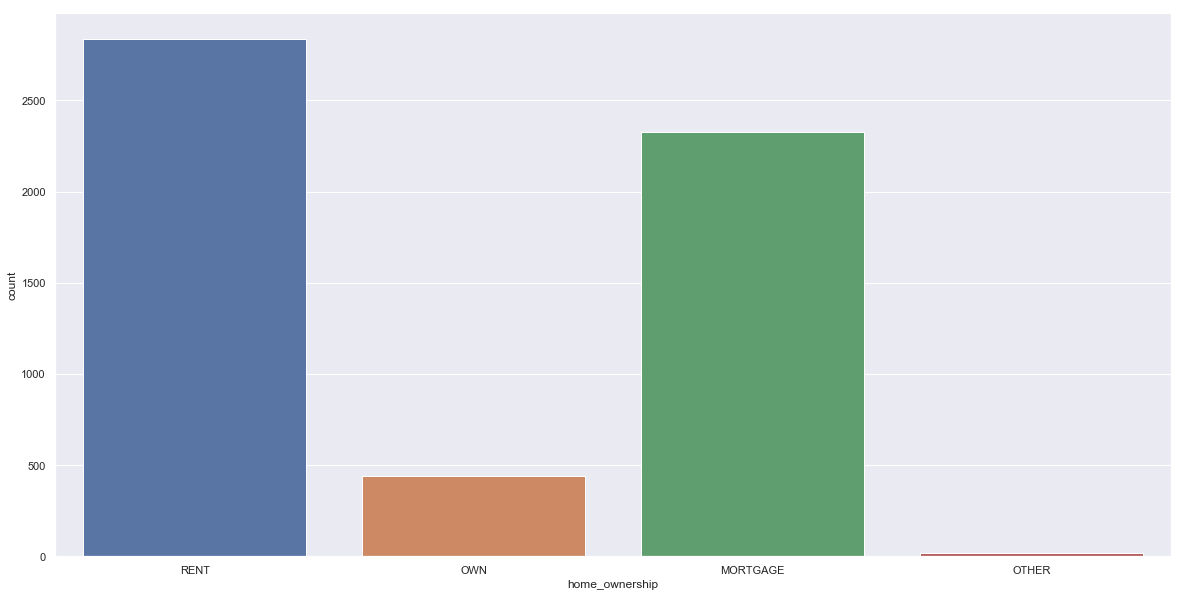

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x=loan_frame_chargedoff.home_ownership)

**Analyis 5 : Loan status with verification status**<br>
we use count plot to see the counts of loan applications that got fully paid and charged off against different income source status.
Status - Declared Income verified or not<br>
**Observation :**
Even though there are defaulters whoes income are verified. we can see that percentage of defaulters whoes income is not verified is highest.<br>
**Suggestion :**Verification should be reviewed and improved accordingly.


Text(0,0.5,'Number of applications')

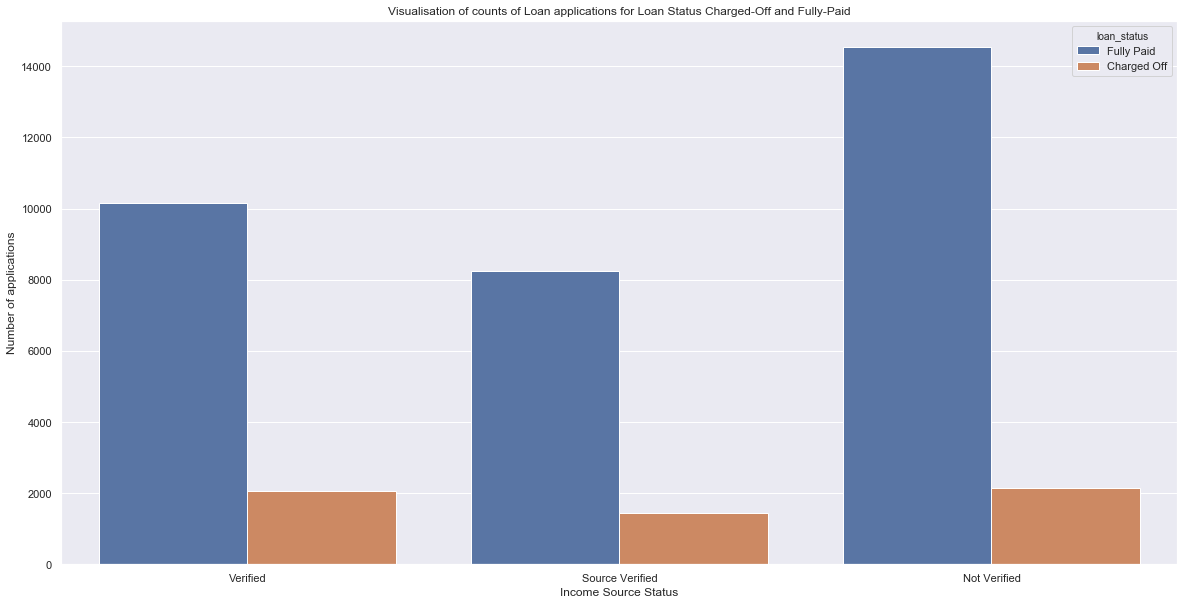

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x=loan_paid_and_chrgd_off.verification_status,hue=loan_paid_and_chrgd_off.loan_status)
plt.title('Visualisation of counts of Loan applications for Loan Status Charged-Off and Fully-Paid')
plt.xlabel('Income Source Status')
plt.ylabel('Number of applications')

**Analyis 6 : Loan amount with status as charged off. i.e the Application that got defaulted. (Univariate count)**<br>
we will use the box plot after removing the outliers and will consider till 95th percentile of the loan amount.<br>
**Observation :**
Applicant with loan_amount of in around 10k+- 5k fails to pay the loan and is loss to the company.

In [39]:
#Lets see the 95th percentile loan amount. 
loan_frame_chargedoff.loan_amnt.quantile(0.95)

27300.0

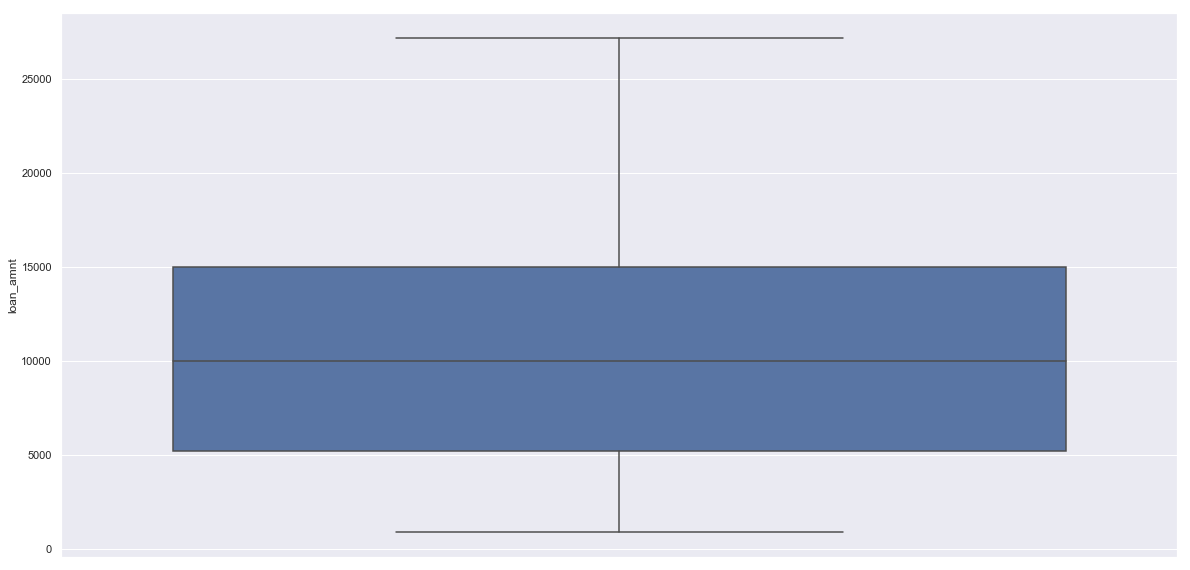

In [40]:
#Modifying the frame, removing the outliers laon amount that failed. 
# Taking 0-95 %ile value. 

loan_frame_chargedoff =loan_frame_chargedoff[loan_frame_chargedoff.loan_amnt<loan_frame_chargedoff.loan_amnt.quantile(0.95)]
sns.boxplot(y=loan_frame_chargedoff.loan_amnt,data=loan_frame_chargedoff)
sns.set_style("whitegrid")

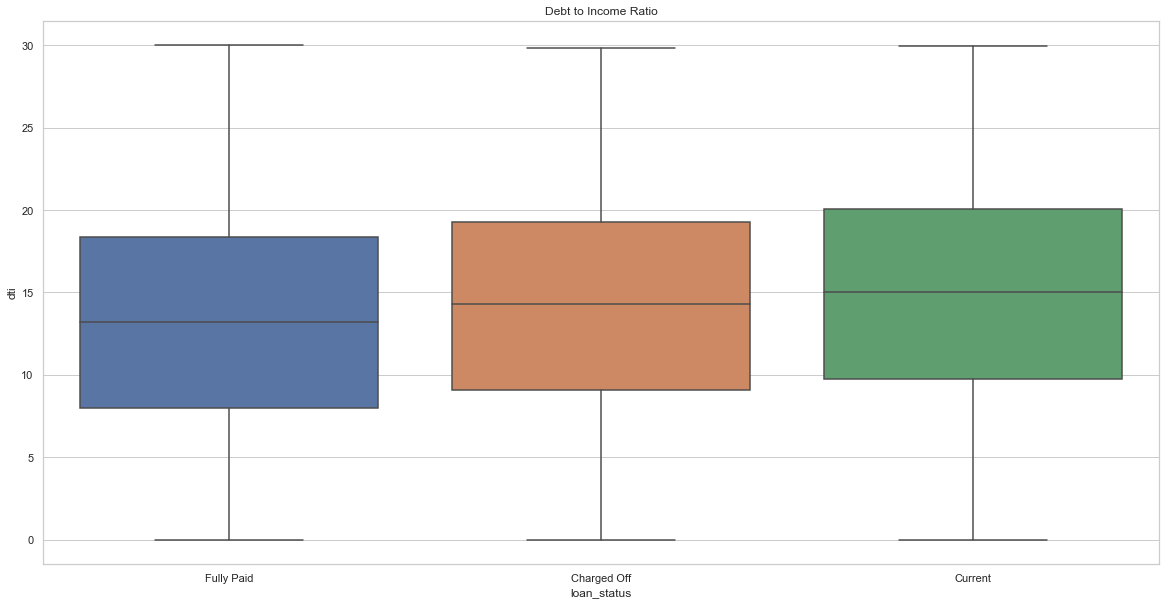

In [41]:
# to plot the values on the vertical axis, specify y=variable
#Clearly we can see that higher dti has been observed for the charged-off 

sns.boxplot(x=loan.loan_status,y=loan.dti)
plt.title('Debt to Income Ratio')
plt.show()

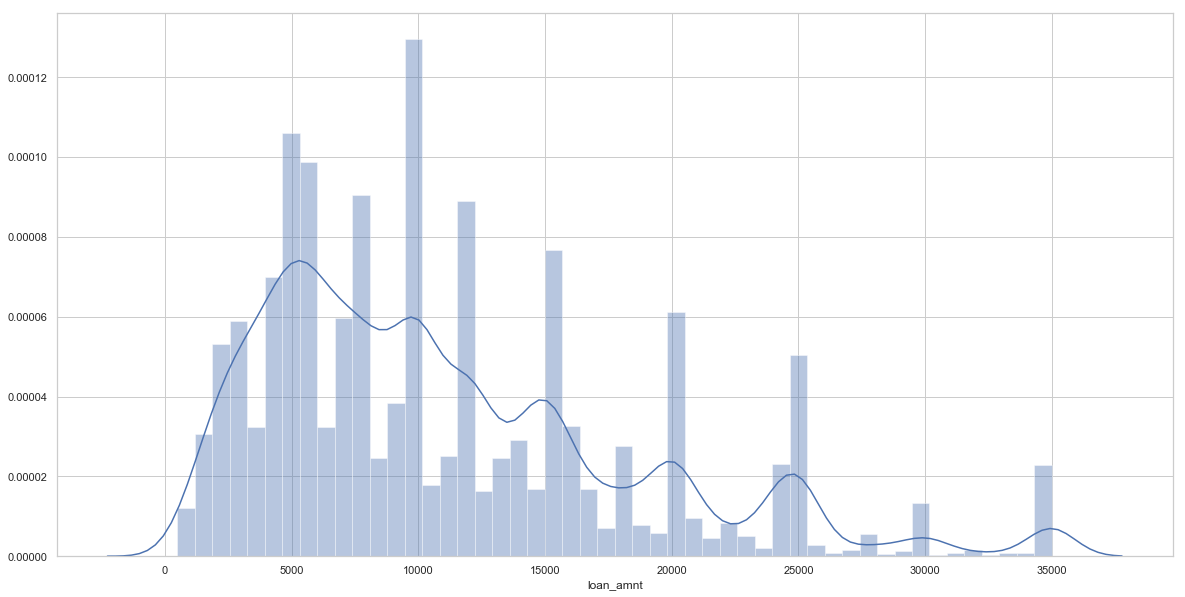

In [42]:
# loan amount: the median loan amount is around 10,000
sns.distplot(loan_frame['loan_amnt'])
plt.show()

In [ ]:
plot_variable('loan_amnt')

**Bivariate Analysis and Plots: Bivariate analysis for different variables has been done and plotted below**<br>
1. Emp_length vs funded Amount. <br>
2. Annual income and home ownership.<br>
3. Loan Amount and debit to income ratio(dti).<br>
4. Grade and interest rate.<br>
5. Funded Amount and declared Annual Income of the borrower.<br><br>
Different behaviour has been observed between these variables.<br><br>
Since grades depends on credit score. On observation we observed,the loan with Grade G are more likely to be defaulted. Borrowers employed for 10+ years are most likely to be defaulted. We also observed that the loan borrowers with purpose for small business are most likely to be defaulted.

In [ ]:
#The below graph shows a clear relation between funded amount and emp length and Int_rate

filtered_frame=loan_paid_and_chrgd_off.sort_values(by=['funded_amnt'])
sns.pairplot(y_vars=['funded_amnt'],x_vars=['emp_length'],data=filtered_frame,hue='loan_status',size=5)

In [ ]:
#We will filter the frame with annual income less than 10 lakhs. This is to zoom out the graph and will try to see the pattern.
filtered_frame = filtered_frame[filtered_frame.annual_inc< 1000000]

In [ ]:
#The below graph shows a clear relation between home_ownership and annual income
filtered_frame=filtered_frame.sort_values(by=['funded_amnt'])
sns.pairplot(y_vars=['home_ownership'],x_vars=['annual_inc'],data=filtered_frame,hue='loan_status',size=5)

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=loan_paid_and_chrgd_off.emp_length,hue=loan_paid_and_chrgd_off.loan_status)
plt.title('Employement length for loan status')
plt.xlabel('Employment length in years')
plt.ylabel('Number of applications')

In [ ]:
loan_frame_chargedoff_modified = loan_frame_chargedoff[loan_frame_chargedoff.loan_amnt<15000]
sns.jointplot('dti','loan_amnt', loan_frame_chargedoff,kind='hex')
plt.show()

In [ ]:
#Interest rates are higher for the higher grades.

filtered_frame=filtered_frame.sort_values(by=['grade'])
sns.pairplot(x_vars=['int_rate'],y_vars=['grade'],data=filtered_frame,hue='loan_status',size=5)


In [ ]:
# We can see that the funded amount is more the borrowers who have more annual income and since the distribution is more towards
#higher income we can say they are the major defaulters.

rng = np.random.RandomState(0)
x = loan_paid_and_chrgd_off.loc[(loan_paid_and_chrgd_off.annual_inc<35000)]['annual_inc']
y = loan_paid_and_chrgd_off.loc[(loan_paid_and_chrgd_off.annual_inc<35000)]['funded_amnt']
colors = rng.rand(6053)

plt.scatter(x, y, c=colors, s=40, alpha=0.5,
           cmap='viridis', label="Annual Income")
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.show()

In [ ]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segment(var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='loan_status', hue='purpose', data=loan_frame)
    plt.show()

    
plot_segment('term')

In [ ]:
# grade of loan
plot_segment('grade')

In [ ]:
# home ownership
plot_segment('home_ownership')

In [ ]:
# emp_length
plot_segment('emp_length')

In [ ]:
# loan_amnt: same trend across loan purposes
plot_segment('loan_amnt')

In [ ]:
# interest rate
plot_segment('int_rate')

In [ ]:
# debt to income ratio
plot_segment('dti')

In [ ]:
# annual income
plot_segment('annual_inc')